## How well do jobs and skills pay for Data Analysts?

### Methology

1. Evaluate median salary for top 6 data job
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [4]:
df_us = df[df['job_country']=='United States'].copy()
df_us = df_us.dropna(subset=['salary_year_avg'])

In [14]:
job_titles = df_us['job_title_short'].value_counts().index[:6].tolist()
df_us_top6 = df[df['job_title_short'].isin(job_titles)]
job_order = df_us_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

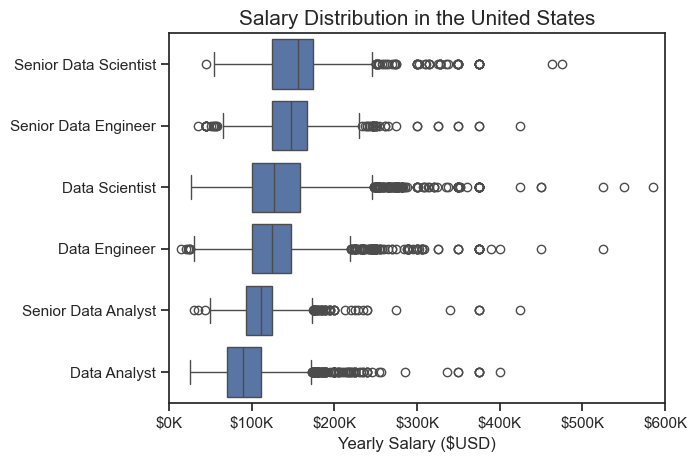

In [16]:
job_list = [df_us[df_us['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]
job_list[0]
sns.set_theme(style='ticks')
sns.boxplot(data=df_us_top6, x='salary_year_avg',y='job_title_short', order=job_order)
plt.title('Salary Distribution in the United States',fontsize=15)
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

In [22]:
df_de_us = df[(df['job_title_short']=='Data Engineer') & (df['job_country']=='United States')].copy()
df_de_us = df_de_us.dropna(subset='salary_year_avg')
df_de_exploded = df_de_us.explode('job_skills')

In [31]:
df_de_top_pay = df_de_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)
df_de_top_pay = df_de_top_pay.head(10)

df_de_skills = df_de_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_de_skills = df_de_skills.head(10).sort_values(by='median',ascending=False)
df_de_skills


,count,median
job_skills,,
kafka,536,145000.00000
nosql,519,140000.00000
spark,968,137410.15625
java,732,137000.00000
redshift,514,135000.00000
aws,1313,131000.00000
snowflake,765,130700.00000
python,2007,127794.50000
sql,2110,125000.00000


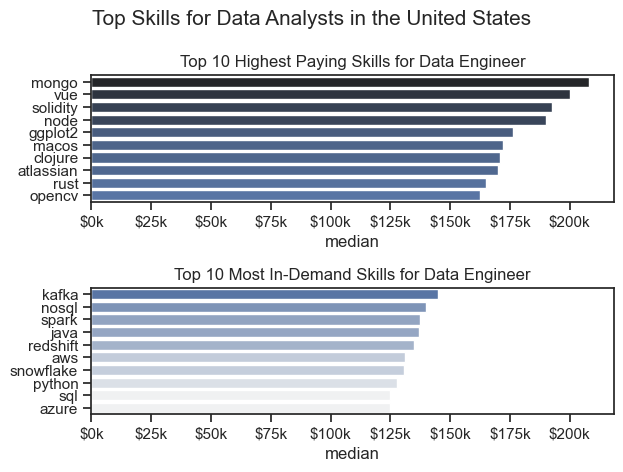

In [32]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')
sns.barplot(data=df_de_top_pay, x='median', y=df_de_top_pay.index,ax=ax[0], hue='median',palette='dark:b_r')
sns.barplot(data=df_de_skills, x='median', y=df_de_skills.index,ax=ax[1], hue='median',palette='light:b')


ax[0].legend().set_visible(False)
ax[1].legend().set_visible(False)

ax[0].set_title('Top 10 Highest Paying Skills for Data Engineer')
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
# ax[0].invert_yaxis()

ax[1].set_title('Top 10 Most In-Demand Skills for Data Engineer')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
# ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
fig.suptitle('Top Skills for Data Analysts in the United States', fontsize=15)
plt.tight_layout()
plt.show()